# Hist 3368 - Week 6 - Controlled Vocabulary Over Time

In this notebook, we're going to use Wordnet and groupby() to study which crimes Congress talked about from 1967 to 2010.    

### Load the data

In [493]:
import datetime
import pandas as pd
import numpy as np
import csv
import glob

In [494]:
cd ~/digital-history

/users/jguldi/digital-history


In [495]:
congress = pd.read_csv("eighties_data.csv")
vocab = pd.read_csv("crime_vocab.csv").drop(['Unnamed: 0'], 1)
vocab = list(vocab['word'])

TROUBLESHOOTING: if the line above doesn't work, you might have missed something earlier this week. If you didn't generate crime_vocab.csv, please look back to the session on Wordnet.

In [496]:
vocab[:10]

['crime',
 'offense',
 'criminal offense',
 'criminal offence',
 'offence',
 'law breaking',
 'attack',
 'attempt',
 'aggravated assault',
 'battery']

In [497]:
crimespeakers = ['Mr. BIDEN', 'Mr. HATCH', 'Mr. LEAHY', 'Mr. KENNEDY', 'Mr. PROXMIRE',
       'Mr. THURMOND', 'Mr. SPECTER', 'Mr. SMITH', 'Mrs. FEINSTEIN',
       'Mr. McCLELLAN']

#### Downsample the data to just the top speakers about crime.

In [498]:
congress = congress.drop(['date', 'month_year', 'word_count', "Unnamed: 0", 'Unnamed: 0.1'], 1)

congress = congress[congress['speaker'].isin(crimespeakers)]

congress.head()

,speech,speaker,year,month
49,Mr. President. on December 20. 1979. the Senat...,Mr. THURMOND,1980,1
166,I wish to compliment the able Senator from Vir...,Mr. THURMOND,1980,1
168,Mr. President. the deception. cruelty. and bru...,Mr. THURMOND,1980,1
171,Mr. President. the American Legion has approxi...,Mr. THURMOND,1980,1
264,Mr. President. I support the agreement on trad...,Mr. KENNEDY,1980,1


#### Lemmatizing, splitting, stripping punctuation

In [499]:
from nltk.corpus import wordnet as wn

To clean our text when our text is in tabular form, we can apply many commands that are familiar.  Technically, they are being applied over each row of the pandas dataframe.  But the pandas software makes it easier for us.

For each speech, we will perform some familiar tasks:

  * We will **.split()** the speech into words
  * we will use **replace** to get rid of punctuation
  * we will use **wn.morphy()** to get the lemma of each word


In theory,  you might imagine writing a loop like this to deal with each cell at a time.  

    new_column = []

    for speech in congress['speech']:

        for c in string.punctuation: # cycle through the punctuation marks
            speech.replace(c,'') # remove punctuation
        speech.lower().split() # lowercase and split
        speech2 = [] # make an empty list to be filled in by the clean words in this individual speech
        for word in speech:
            word = wn.morphy('word') # lemmatize it
            speech2.append(word)
        new_column.append(speech2)

    new_column[:5]
    congress['speech'] = new_column

However, that would take FOREVER.  A more efficient approach is to work with the built-in commands that Pandas takes which work over all the cells in an entire column.

These pandas-native commands have familiar names:

    .str.replace()
    .str.lower()
    .str.split()
    
Let's see them in action.

#### More efficient approach: str.replace() works in pandas without a loop

Get rid of punctuation

In [500]:
congress['speech'] = congress['speech'].str.replace('[^\w\s]','')

Lowercase the text

In [501]:
congress['speech'] = congress['speech'].str.lower()

Split each speech into a list of individual words

In [502]:
congress['speech'] = congress['speech'].str.split()

In [503]:
congress.head()

,speech,speaker,year,month
49,"[mr, president, on, december, 20, 1979, the, s...",Mr. THURMOND,1980,1
166,"[i, wish, to, compliment, the, able, senator, ...",Mr. THURMOND,1980,1
168,"[mr, president, the, deception, cruelty, and, ...",Mr. THURMOND,1980,1
171,"[mr, president, the, american, legion, has, ap...",Mr. THURMOND,1980,1
264,"[mr, president, i, support, the, agreement, on...",Mr. KENNEDY,1980,1


#### A More efficient approach: .apply() for non-native pandas commands

Not every command has a native Pandas approach. With some commands -- for instance our lemmatizer -- we need to tell Pandas to apply the command over each cell in the column.
 
To lemmatize each word, we'll need the help of a helper function and the parallel command 

    apply

which tells Pandas to efficiently 'apply' the command that it takes as its object over all cells in a column.  In this case, we are asking pandas to 'apply' wn.morphy(), our old lemmatizer.

In [504]:
import nltk

def lemmatize_text(text):
    return [wn.morphy(w) for w in text]

congress['lemmas'] = congress['speech'].apply(lemmatize_text)

In [505]:
congress.head()

,speech,speaker,year,month,lemmas
49,"[mr, president, on, december, 20, 1979, the, s...",Mr. THURMOND,1980,1,"[mr, president, on, december, 20, None, None, ..."
166,"[i, wish, to, compliment, the, able, senator, ...",Mr. THURMOND,1980,1,"[i, wish, None, compliment, None, able, senato..."
168,"[mr, president, the, deception, cruelty, and, ...",Mr. THURMOND,1980,1,"[mr, president, None, deception, cruelty, None..."
171,"[mr, president, the, american, legion, has, ap...",Mr. THURMOND,1980,1,"[mr, president, None, american, legion, ha, ap..."
264,"[mr, president, i, support, the, agreement, on...",Mr. KENNEDY,1980,1,"[mr, president, i, support, None, agreement, o..."


See the "None"'s in the table above? They could cause trouble unless we get them out.  

Don't worry too much about the 'apply' formula here -- we will not be teaching the code but you are welcome to use it when you need it

In [506]:
congress['lemmas']  = congress['lemmas'].apply(lambda y: [x for x in y if pd.notna(x)])

In [507]:
congress.head()

,speech,speaker,year,month,lemmas
49,"[mr, president, on, december, 20, 1979, the, s...",Mr. THURMOND,1980,1,"[mr, president, on, december, 20, senate, pass..."
166,"[i, wish, to, compliment, the, able, senator, ...",Mr. THURMOND,1980,1,"[i, wish, compliment, able, senator, virginia,..."
168,"[mr, president, the, deception, cruelty, and, ...",Mr. THURMOND,1980,1,"[mr, president, deception, cruelty, brute, for..."
171,"[mr, president, the, american, legion, has, ap...",Mr. THURMOND,1980,1,"[mr, president, american, legion, ha, approxim..."
264,"[mr, president, i, support, the, agreement, on...",Mr. KENNEDY,1980,1,"[mr, president, i, support, agreement, on, tra..."


#### Minor Reformatting

Glue the words back together into a string using **.str.join()** 

In [508]:
newcolumn = [] 
for row in congress['lemmas']:
        row = ' '.join(row)
        newcolumn.append(row)
congress['lemmas'] = newcolumn

In [509]:
congress.head()

,speech,speaker,year,month,lemmas
49,"[mr, president, on, december, 20, 1979, the, s...",Mr. THURMOND,1980,1,mr president on december 20 senate pass s a bi...
166,"[i, wish, to, compliment, the, able, senator, ...",Mr. THURMOND,1980,1,i wish compliment able senator virginia commen...
168,"[mr, president, the, deception, cruelty, and, ...",Mr. THURMOND,1980,1,mr president deception cruelty brute force sov...
171,"[mr, president, the, american, legion, has, ap...",Mr. THURMOND,1980,1,mr president american legion ha approximately ...
264,"[mr, president, i, support, the, agreement, on...",Mr. KENNEDY,1980,1,mr president i support agreement on trade rela...


## Finding a controlled vocabulary in tabular data

In an earlier lesson we learned about using re.compile and special characters like \\\b to perform accurate searches.  

In this lesson, we'll use the **trrex** package and one of its commands to search for words:

    tx.make -- to formulate a regex string for correctly searching for multiple words


In [510]:
import trrex as tx

vocabpattern = tx.make(vocab, prefix = r'\b', suffix = r'\b')

In [511]:
vocabpattern

'\\b(?:Tazir\\ crime|j(?:ob|uvenile\\ delinquency)|u(?:nfairness|surpation|xoricide)|nonfeasance|k(?:i(?:dnapping|ll)|navery)|quackery|g(?:ore|a(?:rble|m(?:bling|ing))|rand\\ (?:larceny|theft)|yp|uile)|Had\\ crime|e(?:limination|quivocation|ncroachment|mbezzlement|vil(?:doing)?|xecut(?:ion|e))|o(?:riginal\\ sin|ff(?:en(?:ce|se))?|verrefinement|bsc(?:urantism|enity))|l(?:y(?:nching|ing)|aw\\ breaking|i(?:quidation|berty)|e(?:se\\ majesty|gal\\ injury))|d(?:uplicity|ry\\ gulching|is(?:tort(?:ion)?|honesty|s(?:imulation|e(?:rvice|mbling))|patch)|a(?:koity|coity|mage|te\\ rape)|ouble\\ (?:dealing|cross(?:ing)?)|e(?:pravity|l(?:usion|inquency)|reliction|falcation|vi(?:l(?:try|ment|ry)|a(?:nce|tion))|adly\\ sin|ce(?:ption|it)))|a(?:rmed\\ robbery|ctual\\ sin|ggravated\\ assault|b(?:omination|duction|normality)|lienation\\ of\\ affection|tt(?:ack|empt)|ssa(?:ssination|ult(?:\\ and\\ battery)?))|w(?:ar(?:\\ crime|p)|i(?:ckedness|le)|rong)|i(?:rre(?:verence|gularity)|ll(?:\\ (?:turn|service)|us

Next we'll use the python function

    .findall() 
    
to find the words in the pandas column and 'extract' just the vocabulary into a new column.

In [512]:
congress["vocab"] = congress["lemmas"].str.findall('({})'.format(vocabpattern))
congress.head()

,speech,speaker,year,month,lemmas,vocab
49,"[mr, president, on, december, 20, 1979, the, s...",Mr. THURMOND,1980,1,mr president on december 20 senate pass s a bi...,[]
166,"[i, wish, to, compliment, the, able, senator, ...",Mr. THURMOND,1980,1,i wish compliment able senator virginia commen...,[]
168,"[mr, president, the, deception, cruelty, and, ...",Mr. THURMOND,1980,1,mr president deception cruelty brute force sov...,"[deception, deception, trick, murder, deceptio..."
171,"[mr, president, the, american, legion, has, ap...",Mr. THURMOND,1980,1,mr president american legion ha approximately ...,[]
264,"[mr, president, i, support, the, agreement, on...",Mr. KENNEDY,1980,1,mr president i support agreement on trade rela...,"[protection, protection, protection]"


#### Minor Cleanup of the dataframe

Drop the rows with nothing (note the **!=** condition, meaning 'is not equal to)

In [513]:
congress = congress[congress.astype(str)['vocab'] != '[]']
congress.head()

,speech,speaker,year,month,lemmas,vocab
168,"[mr, president, the, deception, cruelty, and, ...",Mr. THURMOND,1980,1,mr president deception cruelty brute force sov...,"[deception, deception, trick, murder, deceptio..."
264,"[mr, president, i, support, the, agreement, on...",Mr. KENNEDY,1980,1,mr president i support agreement on trade rela...,"[protection, protection, protection]"
306,"[mr, president, as, we, begin, another, sessio...",Mr. PROXMIRE,1980,1,mr president as begin another session i find i...,[hit]
386,"[mr, president, it, has, been, said, that, a, ...",Mr. KENNEDY,1980,1,mr president it ha be say a man be never old r...,"[commission, commission, off, obscenity, off, ..."
1302,"[mr, president, today, we, mourn, the, loss, o...",Mr. PROXMIRE,1980,1,mr president today mourn loss one nation great...,"[liberty, crime, liberty]"


We might as well drop any rows that don't have information in the column 'controlled vocab' because we're only studying controlled vocab


In [514]:
vocabspeeches = congress.copy()
vocabspeeches = vocabspeeches.drop(['speech', 'month', 'lemmas'], 1)
vocabspeeches.head()

,speaker,year,vocab
168,Mr. THURMOND,1980,"[deception, deception, trick, murder, deceptio..."
264,Mr. KENNEDY,1980,"[protection, protection, protection]"
306,Mr. PROXMIRE,1980,[hit]
386,Mr. KENNEDY,1980,"[commission, commission, off, obscenity, off, ..."
1302,Mr. PROXMIRE,1980,"[liberty, crime, liberty]"


## Count words per year

Counting words per year in tabular data isn't as easy as counting the number of times Mr. Biden gave a speech, because the data is already organized around speakers -- but not around words.  

To count words, we have to first rearrange the data in a format where each individual word of each speech has its own row.

### Use .explode() to format words for grouped counting

To count the controlled vocabulary, we need each word to be on its own line.  The command

    * .expode()

takes one object -- the name of a column.  Applied to tabular data, .explode() separates each member of a list into its own row.  The other columns are populated with the infromation that applied to the original row.  

For our purposes, this will mean that each word in the controlled_vocab column has its own row, and we can count.

In [515]:
vocabspeeches = vocabspeeches.explode('vocab')

In [516]:
vocabspeeches.head()

,speaker,year,vocab
168,Mr. THURMOND,1980,deception
168,Mr. THURMOND,1980,deception
168,Mr. THURMOND,1980,trick
168,Mr. THURMOND,1980,murder
168,Mr. THURMOND,1980,deception


### Short digression on the bigram problem

In an earlier notebook, we saw a complex path to working with bigrams from wordnet.  First, we had to divide our original text into n-grams, and then separately match the n-gram phrases from the raw text with the controlled vocabulary.

Fortunately for us, working with **.findall** means that we don't have to go through such shenanigans.  

We can check out the work of .findall by inspecting the data.  Remember that .unique() returns all unique values for a dataframe:

In [517]:
vocabspeeches['vocab'].unique()

array(['deception', 'trick', 'murder', 'crime', 'fall', 'attack',
       'violation', 'infraction', 'duplicity', 'protection', 'hit',
       'commission', 'off', 'obscenity', 'liberty', 'tribute',
       'perversion', 'attempt', 'take in', 'remove', 'torture',
       'slaughter', 'immorality', 'felony', 'offense', 'kill',
       'misappropriation', 'job', 'play', 'damage', 'petty', 'vice',
       'depravity', 'perfidy', 'execute', 'technical', 'illusion',
       'wrong', 'elimination', 'assault', 'distort', 'maintenance',
       'mass murder', 'con', 'execution', 'injustice', 'intrusion',
       'usurpation', 'injury', 'sin', 'inroad', 'distortion',
       'encroachment', 'evil', 'warp', 'sting', 'gore', 'abomination',
       'slay', 'infringement', 'hell', 'rolling', 'tort', 'caper',
       'fraud', 'assassination', 'bloodshed', 'transgression',
       'sophistication', 'cheating', 'impropriety', 'dispatch',
       'massacre', 'homicide', 'fabrication', 'carnage', 'blackmail',
       

### Count exploded data with .groupby()

After using .explode(), we have a column of individual words with the years in which they appeared. 

Now is an appropriate time to count.  We will **group** the data by 'vocab' and 'year', and then ask pandas to 

    .sum()

the number of rows for each 'vocab' item per year. This will produce a new column of vocab-per-year counts, which we will name 'count.'

In [518]:
vocab_per_year = vocabspeeches.groupby(['vocab', 'year'], as_index = False)['year'].sum().reset_index()
vocab_per_year.columns = ['vocab', 'year', 'count']
vocab_per_year[:30]

,vocab,year,count
0,abduction,1980,1980
1,abduction,1981,11886
2,abduction,1982,1982
3,abduction,1983,13881
4,abduction,1984,25792
5,abduction,1985,13895
6,abduction,1986,9930
7,abduction,1987,1987
8,abduction,1988,9940
9,abduction,1989,15912


How many mentions of each word are there across all years? 

Let's group by just 'vocab' to find out. In this case we will use 

    .count()
    
to count the number of rows.  

Why are we using .count() and not .sum() here?  Because .sum() assumed a number of counts and then needed to add them.  When we groupby() only one column at a time, we use .count().

In [525]:
per_vocab_totals = vocabspeeches.groupby(['vocab'])['vocab'].count()

#minor reformatting 
per_vocab_totals = per_vocab_totals.to_frame() # convert the resulting series to a dataframe
per_vocab_totals.columns = ['count'] # rename the column 'count'
per_vocab_totals = per_vocab_totals.reset_index() # reset the index so that 'vocab' has a column of its own.

per_vocab_totals.nlargest(20, ['count'])

,vocab,count
98,job,6069
29,crime,4811
23,commission,3568
143,protection,2975
128,off,2335
6,attempt,2327
5,attack,2277
195,violation,2011
199,wrong,1791
125,murder,1461


Let's use .nlargest() to find the five most popular vocab words.

In [526]:
topvocab = per_vocab_totals.nlargest(5, ['count'])
topvocab = list(topvocab['vocab'])
topvocab

['job', 'crime', 'commission', 'protection', 'off']

We can use .isin() to filter vocab_per_year for just the instances describing one of the words in topvocab.

This produces a list of the top vocabulary words over time.  We're looking at just the top few rows, but the dataframe has word counts for each of the top vocab words for each year in the dataframe.

In [521]:
topvocabperyear = vocab_per_year[vocab_per_year['vocab'].isin(topvocab)]
topvocabperyear[:5]

,vocab,year,count
172,commission,1980,542520
173,commission,1981,572509
174,commission,1982,556942
175,commission,1983,1427760
176,commission,1984,712256


## Visualize the top vocab words over time



In the visualization that follows, we're going to create a scatter-plot of dots, where one dot shows how many times a word appears per month_year. We'll color the dots a different color for each word. Notice the plt.scatter() command, which tells matplotlib to use a scatterplot.

Creating complex plots of this kind sometimes involves writing a for loop where we're essentially layering a new plot for each word and changing the color each time. See if you can understand the for loop to add new colors for each individual word -- that's essentially the only new thing about this graph.


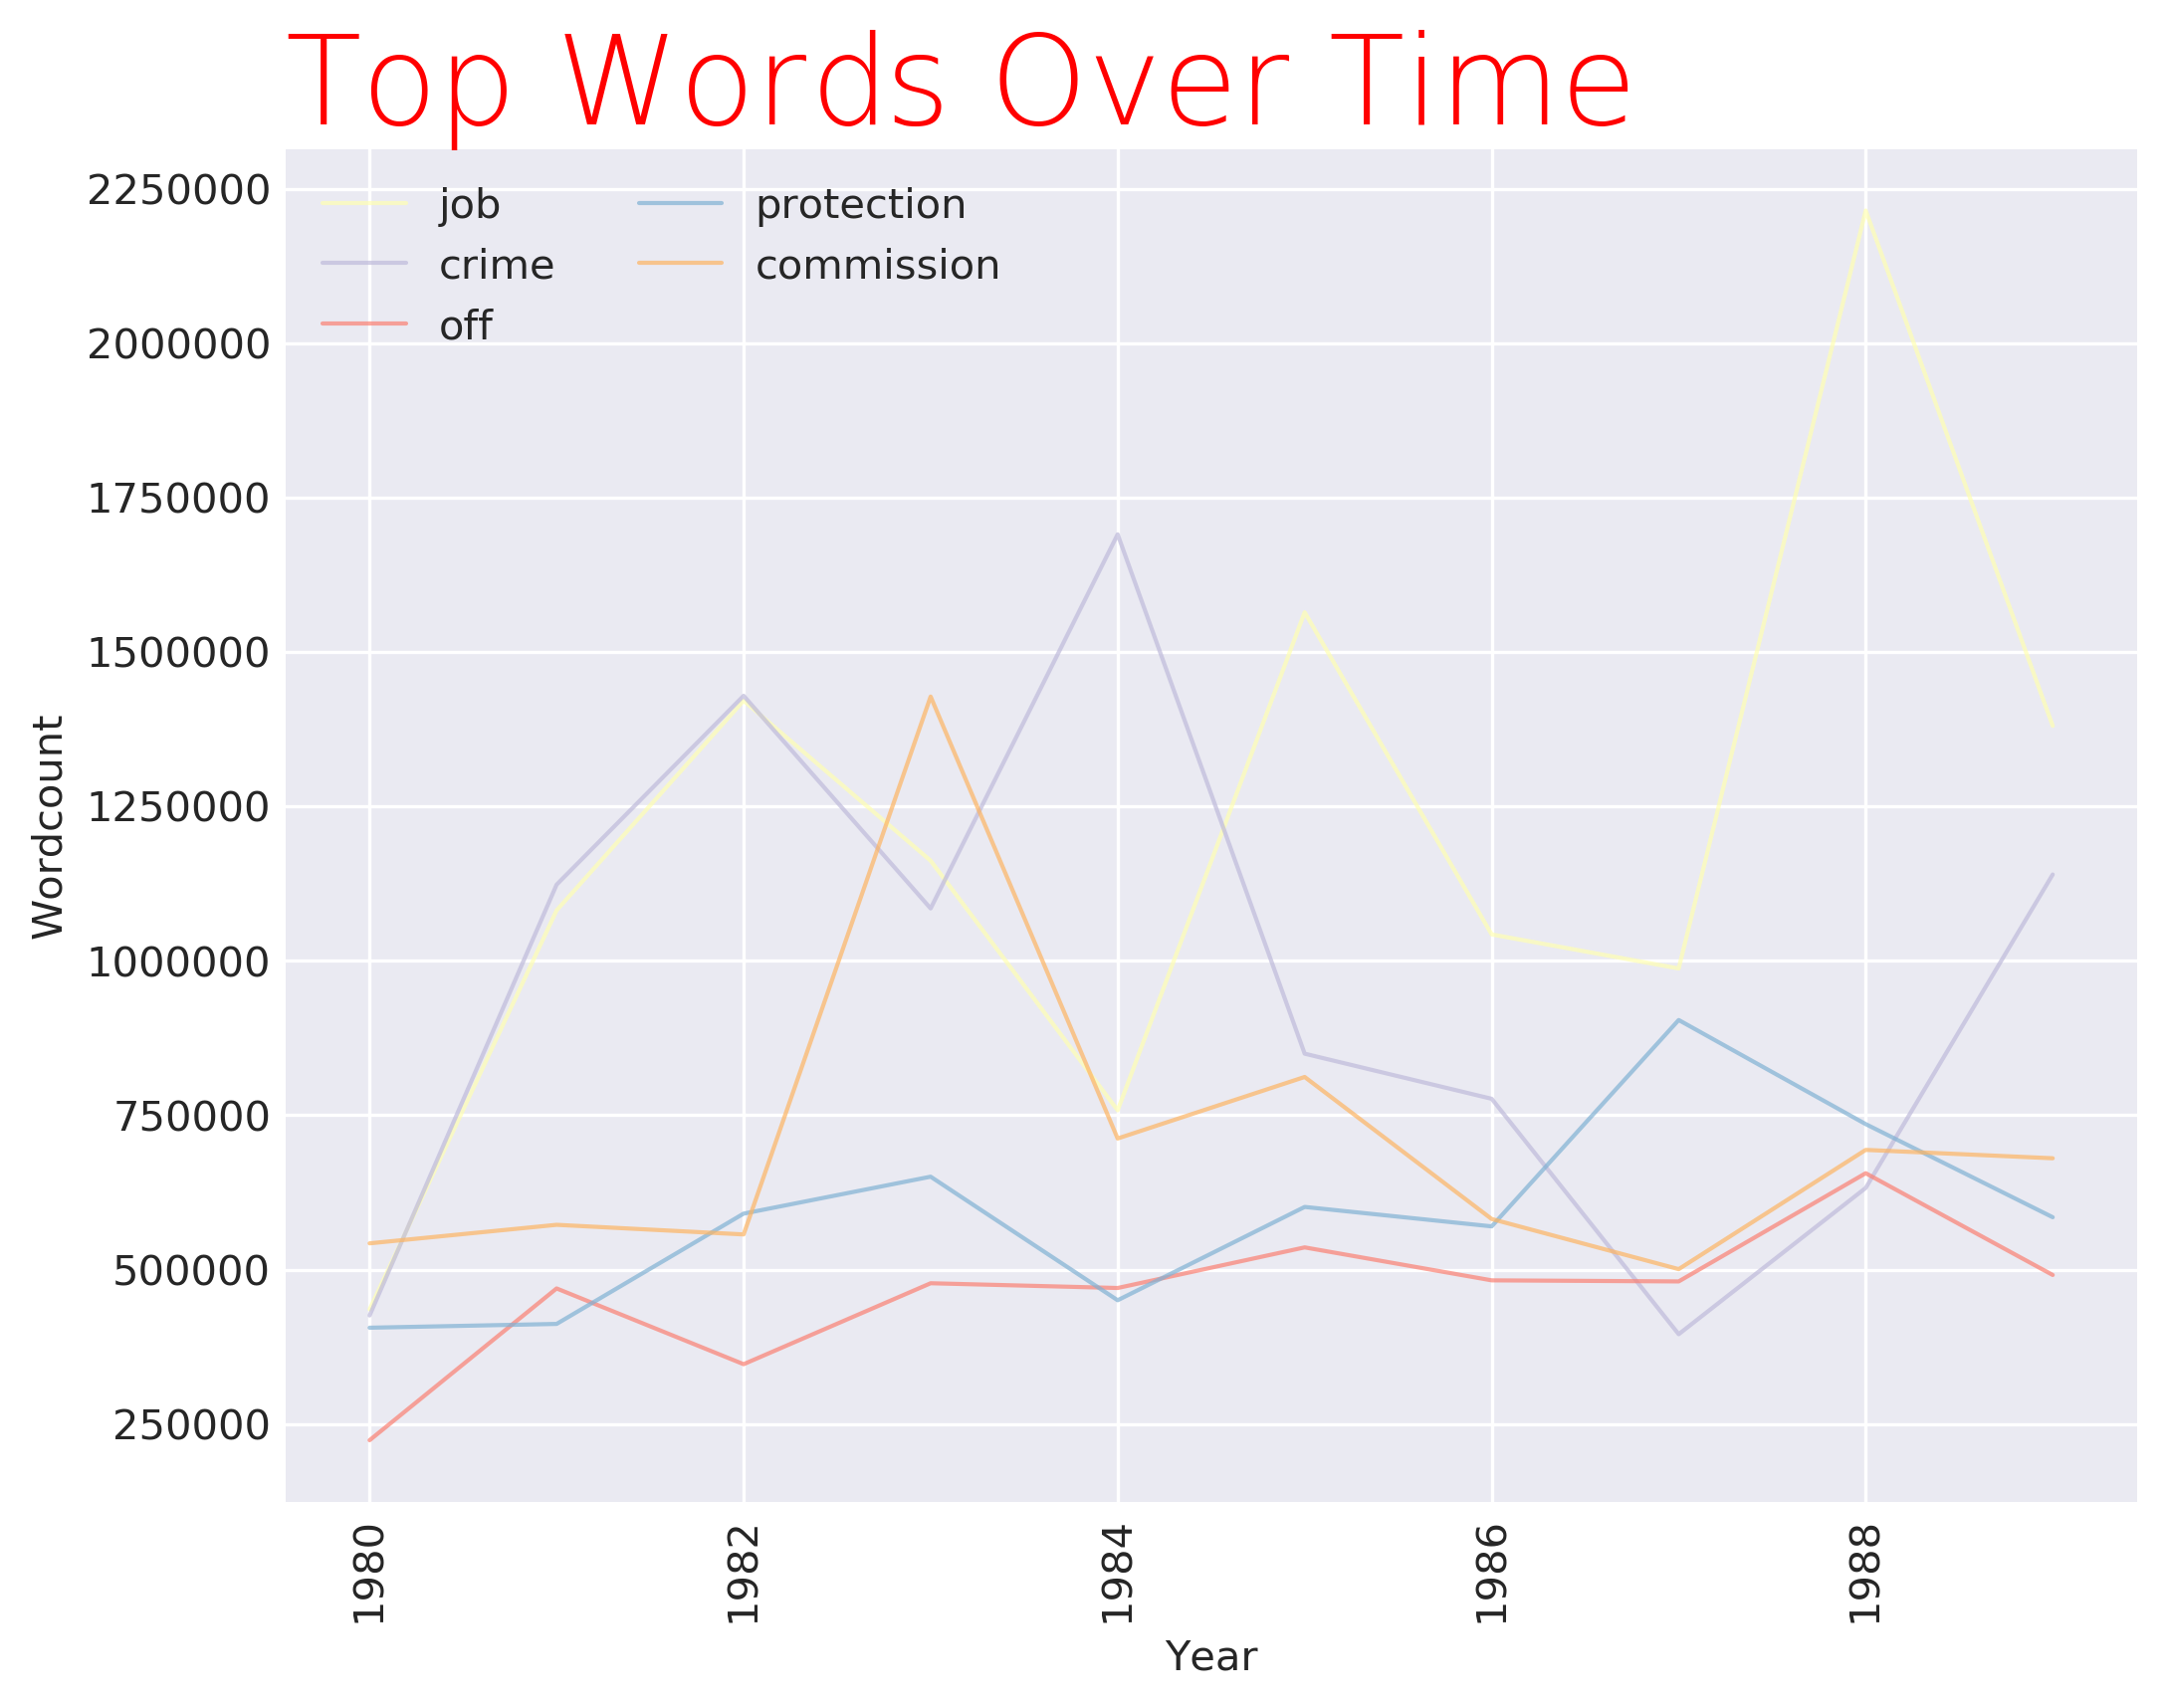

In [522]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

figure(figsize=(8, 6), dpi=300)

# style
plt.style.use('seaborn-darkgrid') # this gives us a grid with a dark background.  you can play with this to change the style.
  
# create a color palette
palette = plt.get_cmap('Set3') # this tells matplotlib what colors to use.  you can play with this to change the colors.
 
# multiple line plot
num=0

# this is the for loop that creates multiple plots
for word in set(topvocabperyear['vocab']):
    num+=1 # for each new word, the counter 'num' changes 
    plt.plot(topvocabperyear.loc[topvocabperyear['vocab'] == word, 'year'], # x axis 
             topvocabperyear.loc[topvocabperyear['vocab'] == word, 'count'],  # y axis
             color=palette(num), linewidth=1, alpha=0.7, label=word) # num tells the plot to choose a different color this time

# Add legend
plt.legend(loc=2, ncol=2)
plt.xticks(rotation=90)
 
# Add titles
plt.title("Top Words Over Time", loc='left', fontsize=30, fontweight=0, color='Red')
plt.xlabel("Year")
plt.ylabel("Wordcount")

plt.show()



#### Digression on date formats

In the code above, we've used 'year' as our only date.  If we wanted to plot information by month, we'd need to do some reformatting.

Matplotlib likes data in the format y-m-d or d-m-y, not month_year. 

Fortunately, the datetime package can hep us to regularize the dates.

Here's the formula for date formatting to make Matplotlib happy.

In [523]:
# convert month-year back to date format for easier plotting
congress['month_year'] =congress.month_year.values.astype('datetime64[M]')

AttributeError: 'DataFrame' object has no attribute 'month_year'

# Get proportions

Let's quickly think about measuring the proportions of each word over time.  


#### Count how many words were spoken overall per year.

To measure the proportions, rather than the word count, we need to know how many times each word was spoken overall in Congress each year.

We will use 

    .groupby()
    .sum()

plus some minor reformatting:

    .reset_index()

In [ ]:
congress = pd.read_csv("eighties_data.csv")

word_per_year_counts = congress.groupby(['year']).sum().copy() 

word_per_year_counts = word_per_year_counts[['word_count']].copy()

word_per_year_counts.reset_index(level=0, inplace=True)

word_per_year_counts

What was the maximum number of words spoken in Congress at this time?

In [ ]:
max(word_per_year_counts['word_count'])

In [ ]:
word_per_year_counts.head()

To count words per month we'd use this:

In [ ]:
words_per_month_counts = congress.groupby(['month_year']).sum()
words_per_month_counts = words_per_month_counts[['word_count']].copy() 
words_per_month_counts.reset_index(level=0, inplace=True)
words_per_month_counts['year'] = pd.to_datetime(words_per_month_counts['month_year']).dt.year # now we can make a column for just the year 
words_per_month_counts

#### Quick Diversion: Graphing Wordcount Over Time

Let's represent change over time by graphing the counts over months. 

Sometimes it's useful when working with dates to create an 'index' for the dataframe, which in this case will be used by matplotlib to decide which dates will be labeled.

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:

plt.rcParams['figure.figsize'] = [10, 5] # make the vis larger so it's easier to see 

a = words_per_month_counts.plot.bar(x = "year", y = "word_count", title = "Words per Month in Congress") # assign columns from the panda's DataFrame to the X and Y axis. 

# the following code makes all tick labels invisible, and then makes visible
# every 12th (since there are 12 months in a year)

plt.setp(a.get_xticklabels()[::1], visible=False)
plt.setp(a.get_xticklabels()[::24], visible=True)

a

In this representation we can see that there's a lot of variation of how much Congress spoke and when.   Notice that there's a huge amount of variation -- from almost nothing to quite a lot.  These variations can create trouble for us if we aren't careful!

#### Proportion = count of the vocabulary words / count of all words

To calculate the proportions of our controlled vocab, we need to divide the count of vocab words over the count of all words:

    count of the vocabulary words / count of all words

The problem is that our vocab counts live in one dataframe -- topvocabperyear -- where our overall word counts for congress life in another dataframe -- word_per_year_counts.

We need to 'merge' two dataframes so that we have information about each year in the same dataframe as the per-year count of our top vocab words.   We'll use the function

    pd.merge(a, b)

-- which takes two objects, a and b, each of which are a dataframe.
    

The technical word for the kind of 'merge' we will perform is an "inner join."  Notice this command:

    how = 'inner'

You can picture an inner join like the area at the center of a venn diagram: in this case, both dataframes share the column month_year.  So we can tell python to paste them together using month_year.

We also tell pd.merge() which columns to use

    left_on='year'
    right_on='year'

In [ ]:
top_vocab_w_per_year = pd.merge(topvocabperyear, word_per_year_counts,how='inner', left_on='year', right_on='year')

top_vocab_w_per_year.head()

Now that we have the count of each word ("count") in the same dataframe as the count of all words per month_year ("word_count"), we can find out what proportion of speech per month_year is represented by each word.

In [ ]:
top_vocab_w_per_year['proportion'] = top_vocab_w_per_year['count']/top_vocab_w_per_year['word_count']
top_vocab_w_per_year[:10]

Notice that the numbers in the "proportion" column are really small.  They represent proportions.

Remember what a proportion is: it's a cut of the pie.  If we had all the counts for every word in the dataset, those proportions would add up to 1.  

We can represent proportions as percentages: if the word "murder" has the proportion .0314, that means that 'murder' is appears 3.14% of the time.  

Knowing what the proportion means and talking about it accurately is an important part of doing data science correctly.  
Understanding proportion also means that we will take steps to make sure that any graph based on proportions represents those measures as percentages and labels them correctly.

## Line chart with proportions

There are only a few ways that the proportion chart differs from the raw count chart.  Can you find them all?

In [ ]:
plt.clf() # <-- clears out the earlier plot

%matplotlib inline
import matplotlib.ticker as ticker # <--- notice that we're importing a new ticker function 

figure(figsize=(8, 6), dpi=300)


# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set3')
 
# multiple line plot
num=0


for word in set(top_vocab_w_per_year['vocab']):
    num+=1
    plt.scatter(top_vocab_w_per_year.loc[top_vocab_w_per_year['vocab'] == word, 'year'], # x axis 
             top_vocab_w_per_year.loc[top_vocab_w_per_year['vocab'] == word, 'proportion'],  # y axis
             color=palette(num), linewidth=1, alpha=0.5, label=word)

# Add legend
plt.legend(loc=2, ncol=2)
plt.xticks(rotation=90)
 
# Add titles
plt.title("Top Words Over Time by Proportion", loc='left', fontsize=30, fontweight=0, color='red')
plt.xlabel("Time")
plt.ylabel("Proportion") # <--- Notice that I've re-labeled the title and y-axis
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter()) # <--- This tells matplotlib that we're dealing with percentages
#plt.tick_params(axis='both',labelsize=14)

plt.show()


#### Dots not Lines?

Notice that this time I made a "dot plot", or "scatter plot", by switching out  plt.scatter() for plt.plot().  Which one is easier to read?  
*Edit the code above back to switch the visualization to a line chart.*

It will be your responsibility moving forward to choose the kind of dataviz that most cleanly and easily conveys informatino about your data.

Matplotlib has lots of different visualization styles to choose from. You can learn more by consulting a tutorial:
    
    https://github.com/rougier/matplotlib-tutorial

#### How are Proportions different than Counts?

How do the results of analyzing count and proportion compare? Sometimes taking the proportion can make a big difference.  

For instance, if Congress simply met more frequently in particular years, that might produce an artificial burst of the count of 'murder,' even though the proportion of 'murder' was actually smaller.

It's important for data analysts to know what they are looking at and to use proportion intelligently to correct for artificial distortions in word count.

## Assignment (working in groups)

1) Do you like the results? Are they meaningful? Recall that in an earlier notebook we discussed the importance of stopwording out ambiguous words from your controlled vocabulary search.  Revisit this problem and stopword out any words with multiple meanings such that the word count is likely to not be meaningful.  Recreate the proportion over time visualization with better stopwords.
2) Group by speaker and year and find out how many times each speaker used each of the top vocab words by raw count. Make a visualization.
3) Make a visualization of just the words per year for one speaker by proportion.  
4) Cut and paste code from the wordnet package to find a new expanded vocabulary of words relating to some current event -- for instance, hurricanes, infrastructure, public health, education, or some related issue.  Cut and paste code from this assignment so that you have a neat series of lines of code that clean and lemmatize Congressional speeches, search them for a controlled vocabulary, perform counts and proportions, and graph the proportion counts.  Apply this to your new wordnet vocabulary.  
5) Recreate task #4 with data from your data challenge.

Upload five visualizations to Canvas.